<a href="https://colab.research.google.com/github/aymanaboghonim/My_Projects/blob/main/POC_Missed_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import essintial libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# import model modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# import model evaluation modules
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

In [2]:
data = pd.read_csv("heart_edited.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1.0,2.0,130.0,NaN,NaN,NaN,NaN,NaN,3.5,0.0,0.0,2.0,1
2,41,0.0,1.0,130.0,NaN,NaN,NaN,NaN,NaN,1.4,2.0,0.0,2.0,1
3,56,1.0,1.0,120.0,NaN,NaN,NaN,NaN,NaN,0.8,2.0,0.0,2.0,1
4,57,0.0,0.0,120.0,NaN,NaN,NaN,NaN,NaN,0.6,2.0,0.0,2.0,1
5,57,1.0,0.0,140.0,NaN,NaN,NaN,NaN,NaN,0.4,1.0,0.0,1.0,1
6,56,0.0,1.0,140.0,NaN,NaN,NaN,NaN,NaN,1.3,1.0,0.0,2.0,1
7,44,1.0,1.0,120.0,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,3.0,1
8,52,1.0,2.0,172.0,NaN,NaN,NaN,NaN,NaN,0.5,2.0,0.0,3.0,1
9,57,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.6,2.0,0.0,2.0,1


In [3]:
#Lets double check the missing values  
data.isna().sum()

age           0
sex          33
cp           54
trestbps     71
chol        106
fbs         106
restecg     106
thalach     106
exang       106
oldpeak      90
slope        90
ca           33
thal         33
target        0
dtype: int64

# Filling with Median

In [4]:
data1= data.copy()

In [5]:
# Fill numeric rows with the median
for label, content in data1.items():
  if pd.isnull(content).sum():
    data1[label] = content.fillna(content.median())


In [6]:
# Splitting data 
x = data1.drop("target", axis = 1) 
# I dropped the features with least correlation which can mislead the models, and also dropped the target value

y = data1["target"]
np.random.seed(42) # random seed for reproduciblity of the result.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [15]:
# put model in dictionary for easy comparing between them based on their evalution metrics.

models = {"logistic regression": LogisticRegression(solver="liblinear"),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
        "GBoost": GradientBoostingClassifier()}
# create a function to score and fit
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    fit and evaluate given machine learning model
    """
    # set random seed
    np.random.seed(42)
    # make a dictionary to store a score
    model_score = {}
    #loop through models
    
    for name,model in models.items():
        #fit the model
        model.fit(x_train, y_train)
        #evaluate the model and append its value to model score
        model_score[name] = model.score(x_test, y_test)
        
    return model_score

In [16]:
model_score = fit_and_score(models=models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <a list of 10 Text major ticklabel objects>)

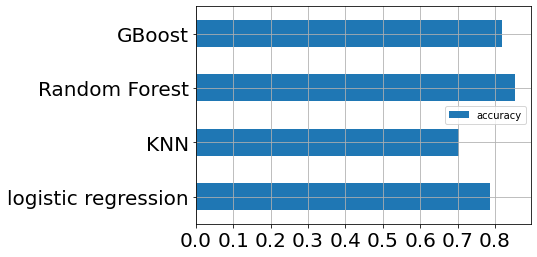

In [17]:
# Lets visualize model_score
model_comparsion = pd.DataFrame(model_score,index=["accuracy"])
model_comparsion.T.plot(fontsize= 20, grid= "True", kind = "barh");
plt.xticks(rotation = 0)


# Filling with Mean

In [18]:
data2= data.copy()

In [19]:
# Fill numeric rows with the median
for label, content in data2.items():
  if pd.isnull(content).sum():
    data2[label] = content.fillna(content.mean())


In [20]:
# Splitting data 
x = data2.drop("target", axis = 1) 
# I dropped the features with least correlation which can mislead the models, and also dropped the target value

y = data2["target"]
np.random.seed(42) # random seed for reproduciblity of the result.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [21]:
model_score = fit_and_score(models=models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

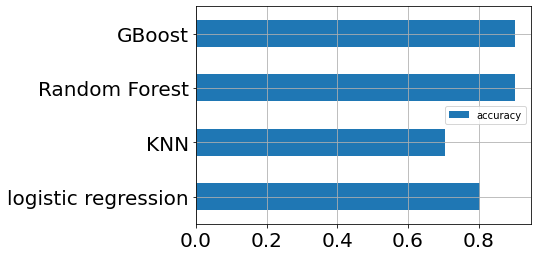

In [22]:
# Lets visualize model_score
model_comparsion = pd.DataFrame(model_score,index=["accuracy"])
model_comparsion.T.plot(fontsize= 20, grid= "True", kind = "barh");
plt.xticks(rotation = 0)


# Dropping Nan

In [30]:
data3= data.dropna()

In [31]:
# Splitting data 
x = data3.drop("target", axis = 1) 
# I dropped the features with least correlation which can mislead the models, and also dropped the target value

y = data3["target"]
np.random.seed(42) # random seed for reproduciblity of the result.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [32]:
model_score = fit_and_score(models=models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <a list of 10 Text major ticklabel objects>)

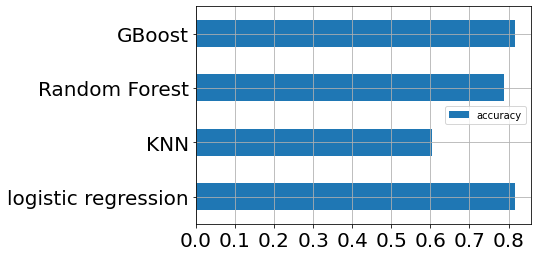

In [36]:
# Lets visualize model_score
model_comparsion = pd.DataFrame(model_score,index=["accuracy"])
model_comparsion.T.plot(fontsize= 20, grid= "True", kind = "barh");
plt.xticks(rotation = 0)
